In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import fftfreq
from astropy.timeseries import LombScargle
%matplotlib inline

# Creating a signal

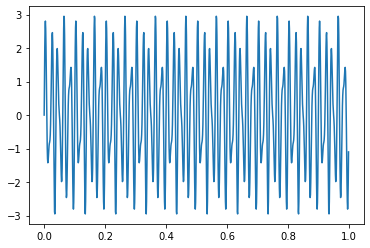

In [2]:
t = np.arange(0,1,0.001)                                         #(start,stop,sampling space)
y = 2*np.sin(2*np.pi*50*t) + np.sin(80*2.0*np.pi*t)              # signal
plt.plot(t,y)

# Discrete fourier transform

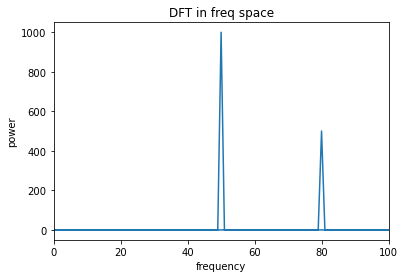

(0.0, 0.1)

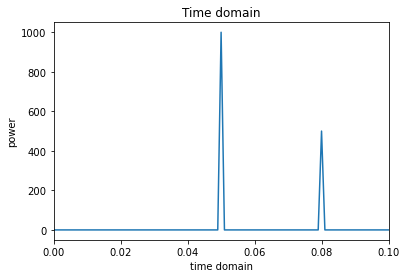

In [3]:
#DFT in frequency space

from scipy.fft import fftfreq

ft = fft(y)
xf = fftfreq(1000, 0.001)   #fftfreq(no. of sample points = 1000, sampling space = 0.001) 

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

plt.title("Time domain")
plt.plot(t,np.abs(ft))
plt.xlabel("time domain")
plt.ylabel("power")
plt.xlim(0,0.1)


# Lomb Scargle

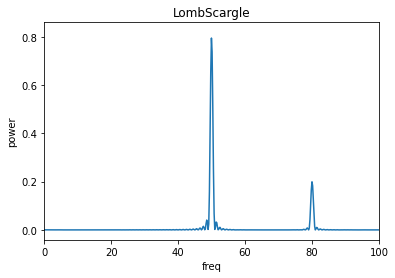

In [4]:
frequency, power = LombScargle(t, y).autopower()
#freq = frequency[np.argmax(power)]
#print(freq)
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency,power)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

# Variations

In [5]:
# add noise(random) to signal and apply both FT and LS
# same freq, diff amp (FT and LS)
# diff freq, same amp (FT and LS)
# create uneven sample and do FT and LS (either use random or remove some part of waves)
# form gaussian and add sine wave nad then apply both FT and LS

# 1) add noise(random) to signal and apply both FT and LS

In [76]:
noise = np.random.normal(0,3,1000)
#print(noise)


# with 100 (second value) no peak visible in LS --- kinda shifted towards left
# with 10 only higher amp frequency visible in LS ---- various other peaks
# with 5 :- freq 50 has clear peak but bot freq 80
# with 3 and below its the best

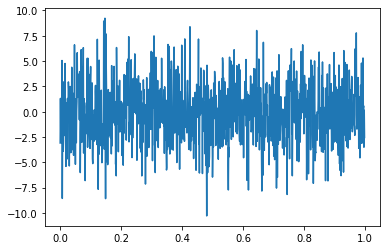

In [77]:
plt.plot(t,noise)     #noise

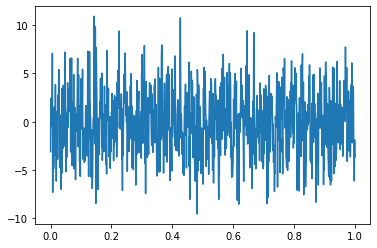

In [78]:
signal = y + noise
#print(signal)

plt.plot(t,signal)    #signal with noise

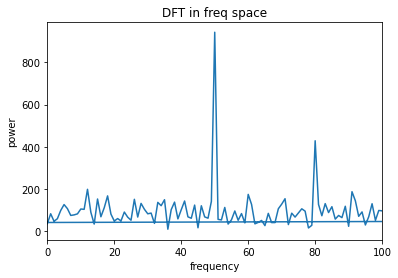

In [100]:
# fourier transform

ft = fft(signal)
xf = fftfreq(1000, 0.001) 

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()


# questions:-
# the blue line at the base??

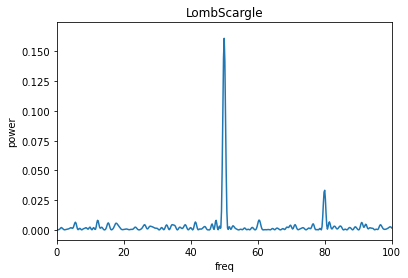

In [101]:
#lomb scargle

frequency1, power1 = LombScargle(t, signal).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency1,power1)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

# 2) same freq, diff amp (FT and LS)

In [112]:
t = np.arange(0,1,0.001)                                        
y2 = 3*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*50*t)              
#plt.plot(t,y2)

In [113]:
noise = np.random.normal(0,3,1000)
signal2 = y2 + noise
#plt.plot(t,signal2)

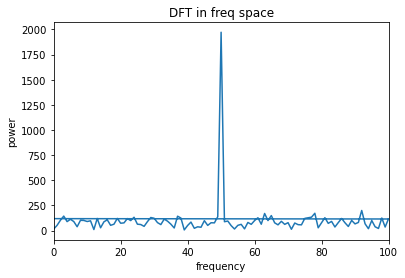

In [114]:
# FT

ft = fft(signal2)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

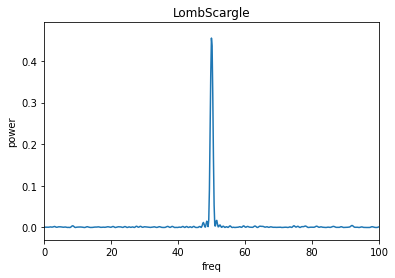

In [115]:
# LS

frequency2, power2 = LombScargle(t, signal2).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency2,power2)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

In [117]:
# freq of 50 but diff amp of 1 and 3
# amps add up -----> not sure (in y axis :- power is above 0.4)

# 3) diff freq, same amp (FT and LS)

In [123]:
t = np.arange(0,1,0.001)                                        
y3 = 3*np.sin(2*np.pi*40*t) + 3*np.sin(2*np.pi*60*t)              
#plt.plot(t,y3)

In [147]:
noise = np.random.normal(0,5,1000)
signal3 = y3 + noise
#plt.plot(t,signal3)

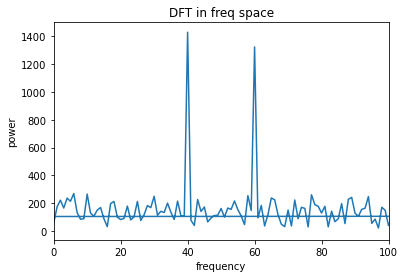

In [148]:
#FT

ft = fft(signal3)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

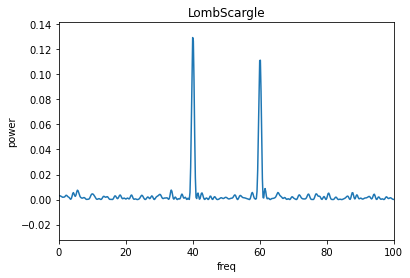

In [149]:
#LS
frequency3, power3 = LombScargle(t, signal3).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency3,power3)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

In [146]:
# diff freq of 40 and 60 does show two diff peaks of same height
# noise (3) ---> works good
# noise (5) ---> peak(40) > peak(60) 
# noise (6) ---> peak(40) > peak(60) ...... why? even though they have same amp in wave formation

# 4) create uneven sample and do FT and LS (either use random or remove some part of waves)

# 5) form gaussian and add sine wave and then apply both FT and LS

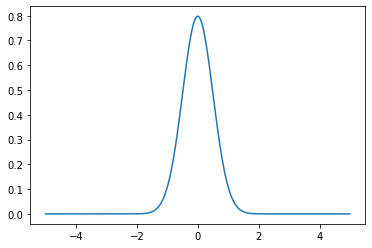

In [263]:
# forming a gaussian

from scipy.stats import norm

x_values = np.arange(-5,5,0.01)     #100  {10/0.1=100}
#print(len(x_values))               #1000
y_values = scipy.stats.norm(0,0.5)   # mean, std deviation
plt.plot(x_values,y_values.pdf(x_values))   # probability density function of normal distribution


#print(len(y_values.pdf(x_values)))  # no. of values = 100
#print(y_values.pdf(x_values))  #gives values

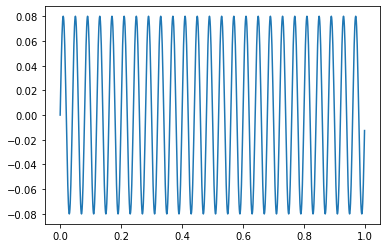

In [266]:
#sine wave

t = np.arange(0,1,0.001)
y5 = 0.08*np.sin(2*np.pi*25*t) 
plt.plot(t,y5)

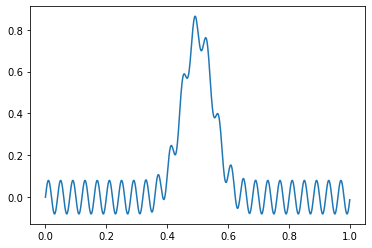

In [267]:
#gaussian + sine wave

s = y5 + y_values.pdf(x_values)

plt.plot(t,s)
plt.show()

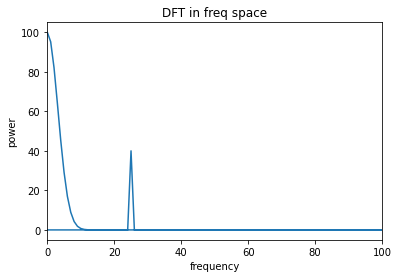

In [275]:
# FT
ft = fft(s)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

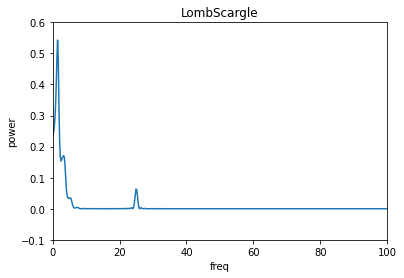

In [269]:
#LS

frequency5, power5 = LombScargle(t, s).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency5,power5)
plt.xlabel("freq")
plt.ylabel("power")
plt.ylim(-0.1,0.6)
plt.show()

In [270]:
#why sudden peak at the start?

# 6) form gaussian and add sine wave  + noise and then apply both FT and LS

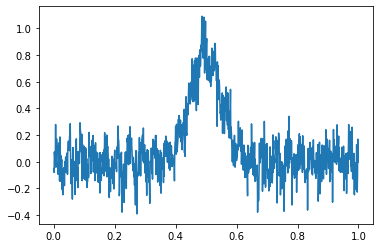

In [278]:
noise = np.random.normal(0,0.1,1000)
s_new = s + noise

plt.plot(t,s_new)

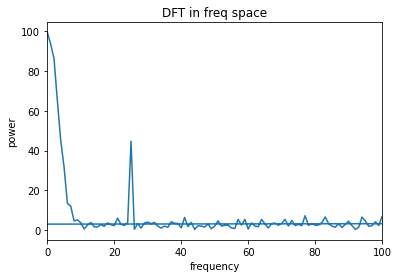

In [279]:
# FT
ft = fft(s_new)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

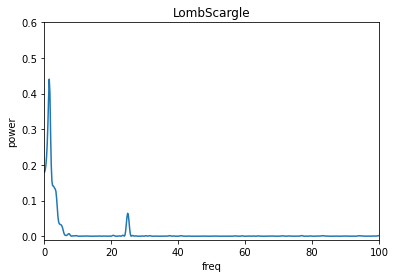

In [281]:
#LS

frequency5, power5 = LombScargle(t, s_new).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency5,power5)
plt.xlabel("freq")
plt.ylabel("power")
plt.ylim(-0.01,0.6)
plt.show()

In [ ]:
# LS deals with noise better than FT